# CAP 5619 AI for FinTech
### Dr. Ramya Akula
#### Chapters 11

# Chapter 11 - Working with Unlabeled Data – Clustering Analysis

In [1]:
from IPython.display import Image
%matplotlib inline

# Grouping objects by similarity using k-means

## K-means clustering using scikit-learn

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

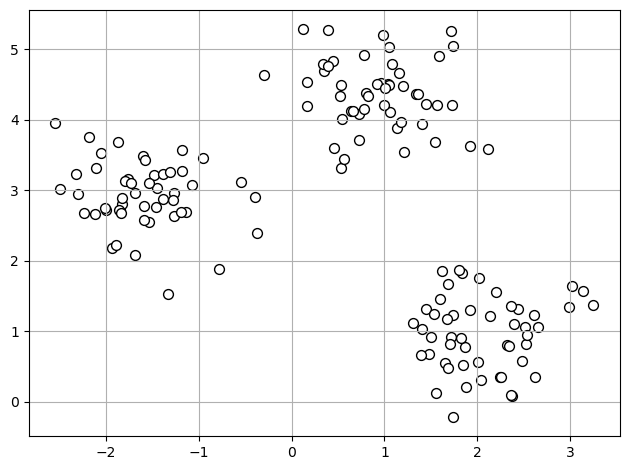

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

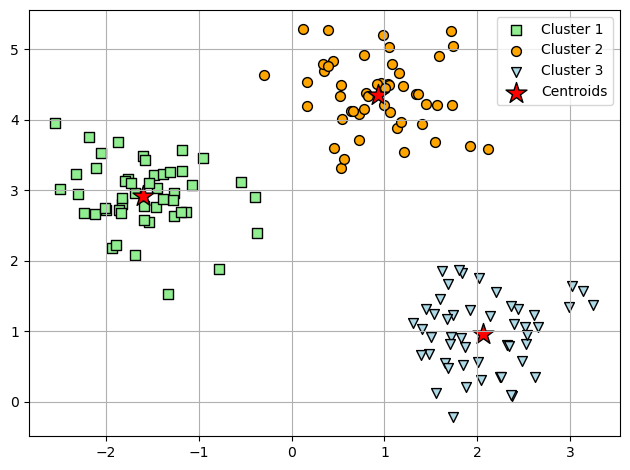

In [5]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

<br>

## A smarter way of placing the initial cluster centroids using k-means++

K-means++ is an algorithm used for initializing the centroids (cluster centers) before running the standard k-means clustering algorithm. K-means++ was proposed by David Arthur and Sergei Vassilvitskii in 2007 as an improvement over the original k-means algorithm.

In the standard k-means algorithm, the initial centroids are chosen randomly from the data points, which can lead to suboptimal clustering results and slow convergence, especially for complex datasets. K-means++ addresses this issue by selecting initial centroids in a more intelligent way.

The steps of the k-means++ initialization are as follows:

1. Choose the first centroid randomly from the data points.
2. For each data point, compute its distance to the nearest centroid that has already been chosen.
3. Select the next centroid from the data points with a probability proportional to the square of the distance to the nearest centroid.
4. Repeat steps 2 and 3 until k centroids have been chosen.

By using this method, k-means++ tends to choose centroids that are well-spaced and representative of the underlying structure of the data, leading to faster convergence and better clustering results compared to random initialization.

After the centroids have been initialized using k-means++, the standard k-means algorithm is applied to assign data points to clusters and update the centroids iteratively until convergence, typically based on some convergence criteria like a maximum number of iterations or small changes in centroids.

## Hard versus soft clustering

Hard clustering and soft clustering are two different approaches to clustering algorithms, each with its own characteristics and use cases.

1. **Hard Clustering**:
   - In hard clustering, each data point is assigned exclusively to one and only one cluster.
   - The goal of hard clustering is to partition the data into disjoint clusters, where each data point belongs to exactly one cluster.
   - The most popular example of hard clustering is the k-means algorithm, where each data point is assigned to the nearest centroid, and each centroid represents a cluster.
   - Hard clustering is useful when the clusters are well-separated and distinct, and when we need a clear assignment of data points to clusters without ambiguity.

2. **Soft Clustering**:
   - In soft clustering (also known as fuzzy clustering or probabilistic clustering), each data point is assigned a probability or membership score indicating the likelihood of it belonging to each cluster.
   - The goal of soft clustering is to represent the uncertainty or ambiguity in the data by allowing data points to have partial membership in multiple clusters.
   - A common example of soft clustering is the fuzzy c-means (FCM) algorithm, where each data point has membership scores for all clusters, and centroids are updated based on the weighted average of data points according to their membership scores.
   - Soft clustering is useful when the boundaries between clusters are not well-defined, and when there is overlap or ambiguity in the data. It provides more nuanced insights into the structure of the data and can be more robust to noise and outliers.

Tthe choice between hard and soft clustering depends on the nature of the data and the specific goals of the analysis. Hard clustering is suitable for well-separated clusters with clear boundaries, while soft clustering is appropriate when there is ambiguity or overlap between clusters and when a more nuanced representation of the data is desired.

...

## Using the elbow method to find the optimal number of clusters 

The elbow method is a heuristic technique used to determine the optimal number of clusters in a dataset for algorithms like k-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters, and identifying the point where the rate of decrease in WCSS starts to slow down, resembling an "elbow" shape in the plot. This point is considered a good estimate for the optimal number of clusters.

Here's a step-by-step guide on how to use the elbow method to find the optimal number of clusters:

1. **Choose the number of clusters**: Start by selecting a range of possible values for the number of clusters (k). This can be based on domain knowledge or by trying out a range of values.

2. **Fit the clustering algorithm**: Apply the clustering algorithm (e.g., k-means) to the dataset for each value of k and compute the WCSS for each clustering solution. WCSS is the sum of squared distances between each point and its assigned centroid within the cluster.

3. **Plot the elbow curve**: Plot the number of clusters (k) against the corresponding WCSS values. This will typically result in a plot where the WCSS decreases as the number of clusters increases.

4. **Identify the elbow point**: Examine the plot to find the point where the rate of decrease in WCSS starts to slow down. This point is often considered as the optimal number of clusters.

5. **Select the optimal number of clusters**: Choose the number of clusters corresponding to the elbow point as the optimal number of clusters for your dataset.

It's important to note that the elbow method is not always definitive, and sometimes the elbow point may not be clearly pronounced. In such cases, other methods or domain knowledge may be needed to determine the optimal number of clusters.

In [6]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


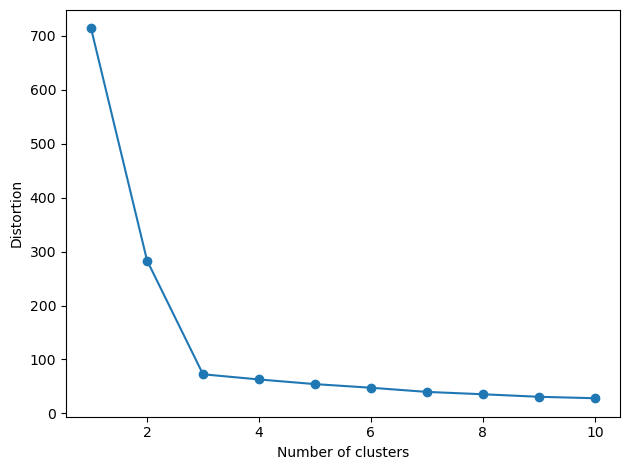

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

<br>

## Quantifying the quality of clustering  via silhouette plots

Silhouette analysis is a technique used to evaluate the quality of clustering in a dataset. Silhouette plots are graphical representations of silhouette coefficients, which measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A high silhouette coefficient indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters, signifying a good clustering.

Here's how silhouette plots work and how to interpret them:

1. **Silhouette Coefficient**:
   - For each data point, the silhouette coefficient is calculated as:  
     $$s = \frac{b - a}{\max(a, b)}$$  
     Where:  
     - \(a\) is the average distance from the data point to other points in the same cluster (cohesion).  
     - \(b\) is the average distance from the data point to points in the nearest neighboring cluster (separation).
   - The silhouette coefficient ranges from -1 to 1:
     - A coefficient close to +1 indicates that the data point is well-clustered.
     - A coefficient close to 0 indicates that the data point lies near the boundary between two clusters.
     - A coefficient close to -1 indicates that the data point may be assigned to the wrong cluster.

2. **Silhouette Plot**:
   - In a silhouette plot, each data point is represented as a bar.
   - The length of the bar corresponds to the silhouette coefficient of the data point.
   - Data points are sorted within their clusters based on their silhouette coefficients, so that clusters with higher average silhouette coefficients appear as thicker, well-defined clusters in the plot.
   - The silhouette plot can provide visual insight into the quality and consistency of clustering. Ideally, you want to see well-separated clusters with predominantly positive silhouette coefficients.

3. **Interpretation**:
   - A silhouette plot with many thick and well-separated clusters indicates good clustering.
   - A silhouette plot with clusters of varying thickness and significant overlap may indicate suboptimal clustering.
   - Negative silhouette coefficients for some data points suggest potential misclassifications or poor cluster assignments.

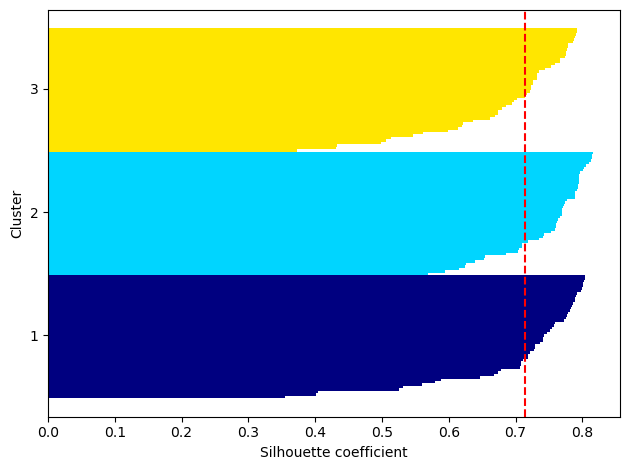

In [8]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

Comparison to "bad" clustering:

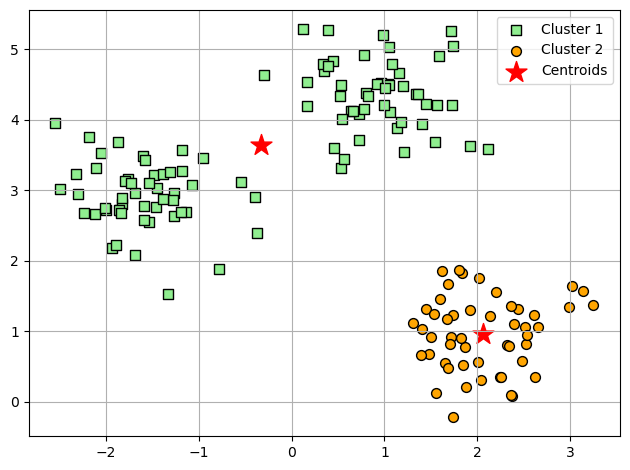

In [9]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

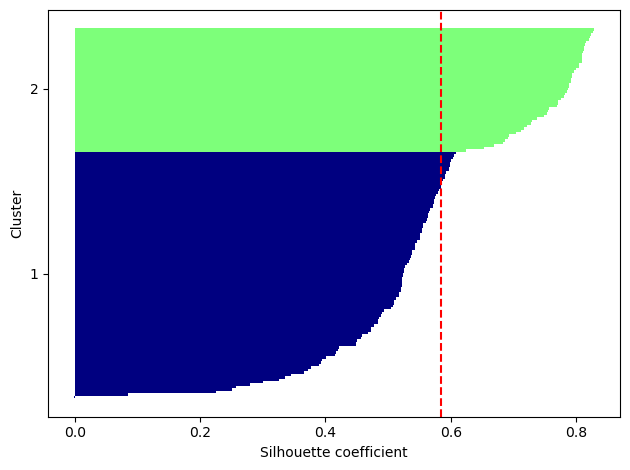

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

<br>
<br>

# Organizing clusters as a hierarchical tree

## Grouping clusters in bottom-up fashion

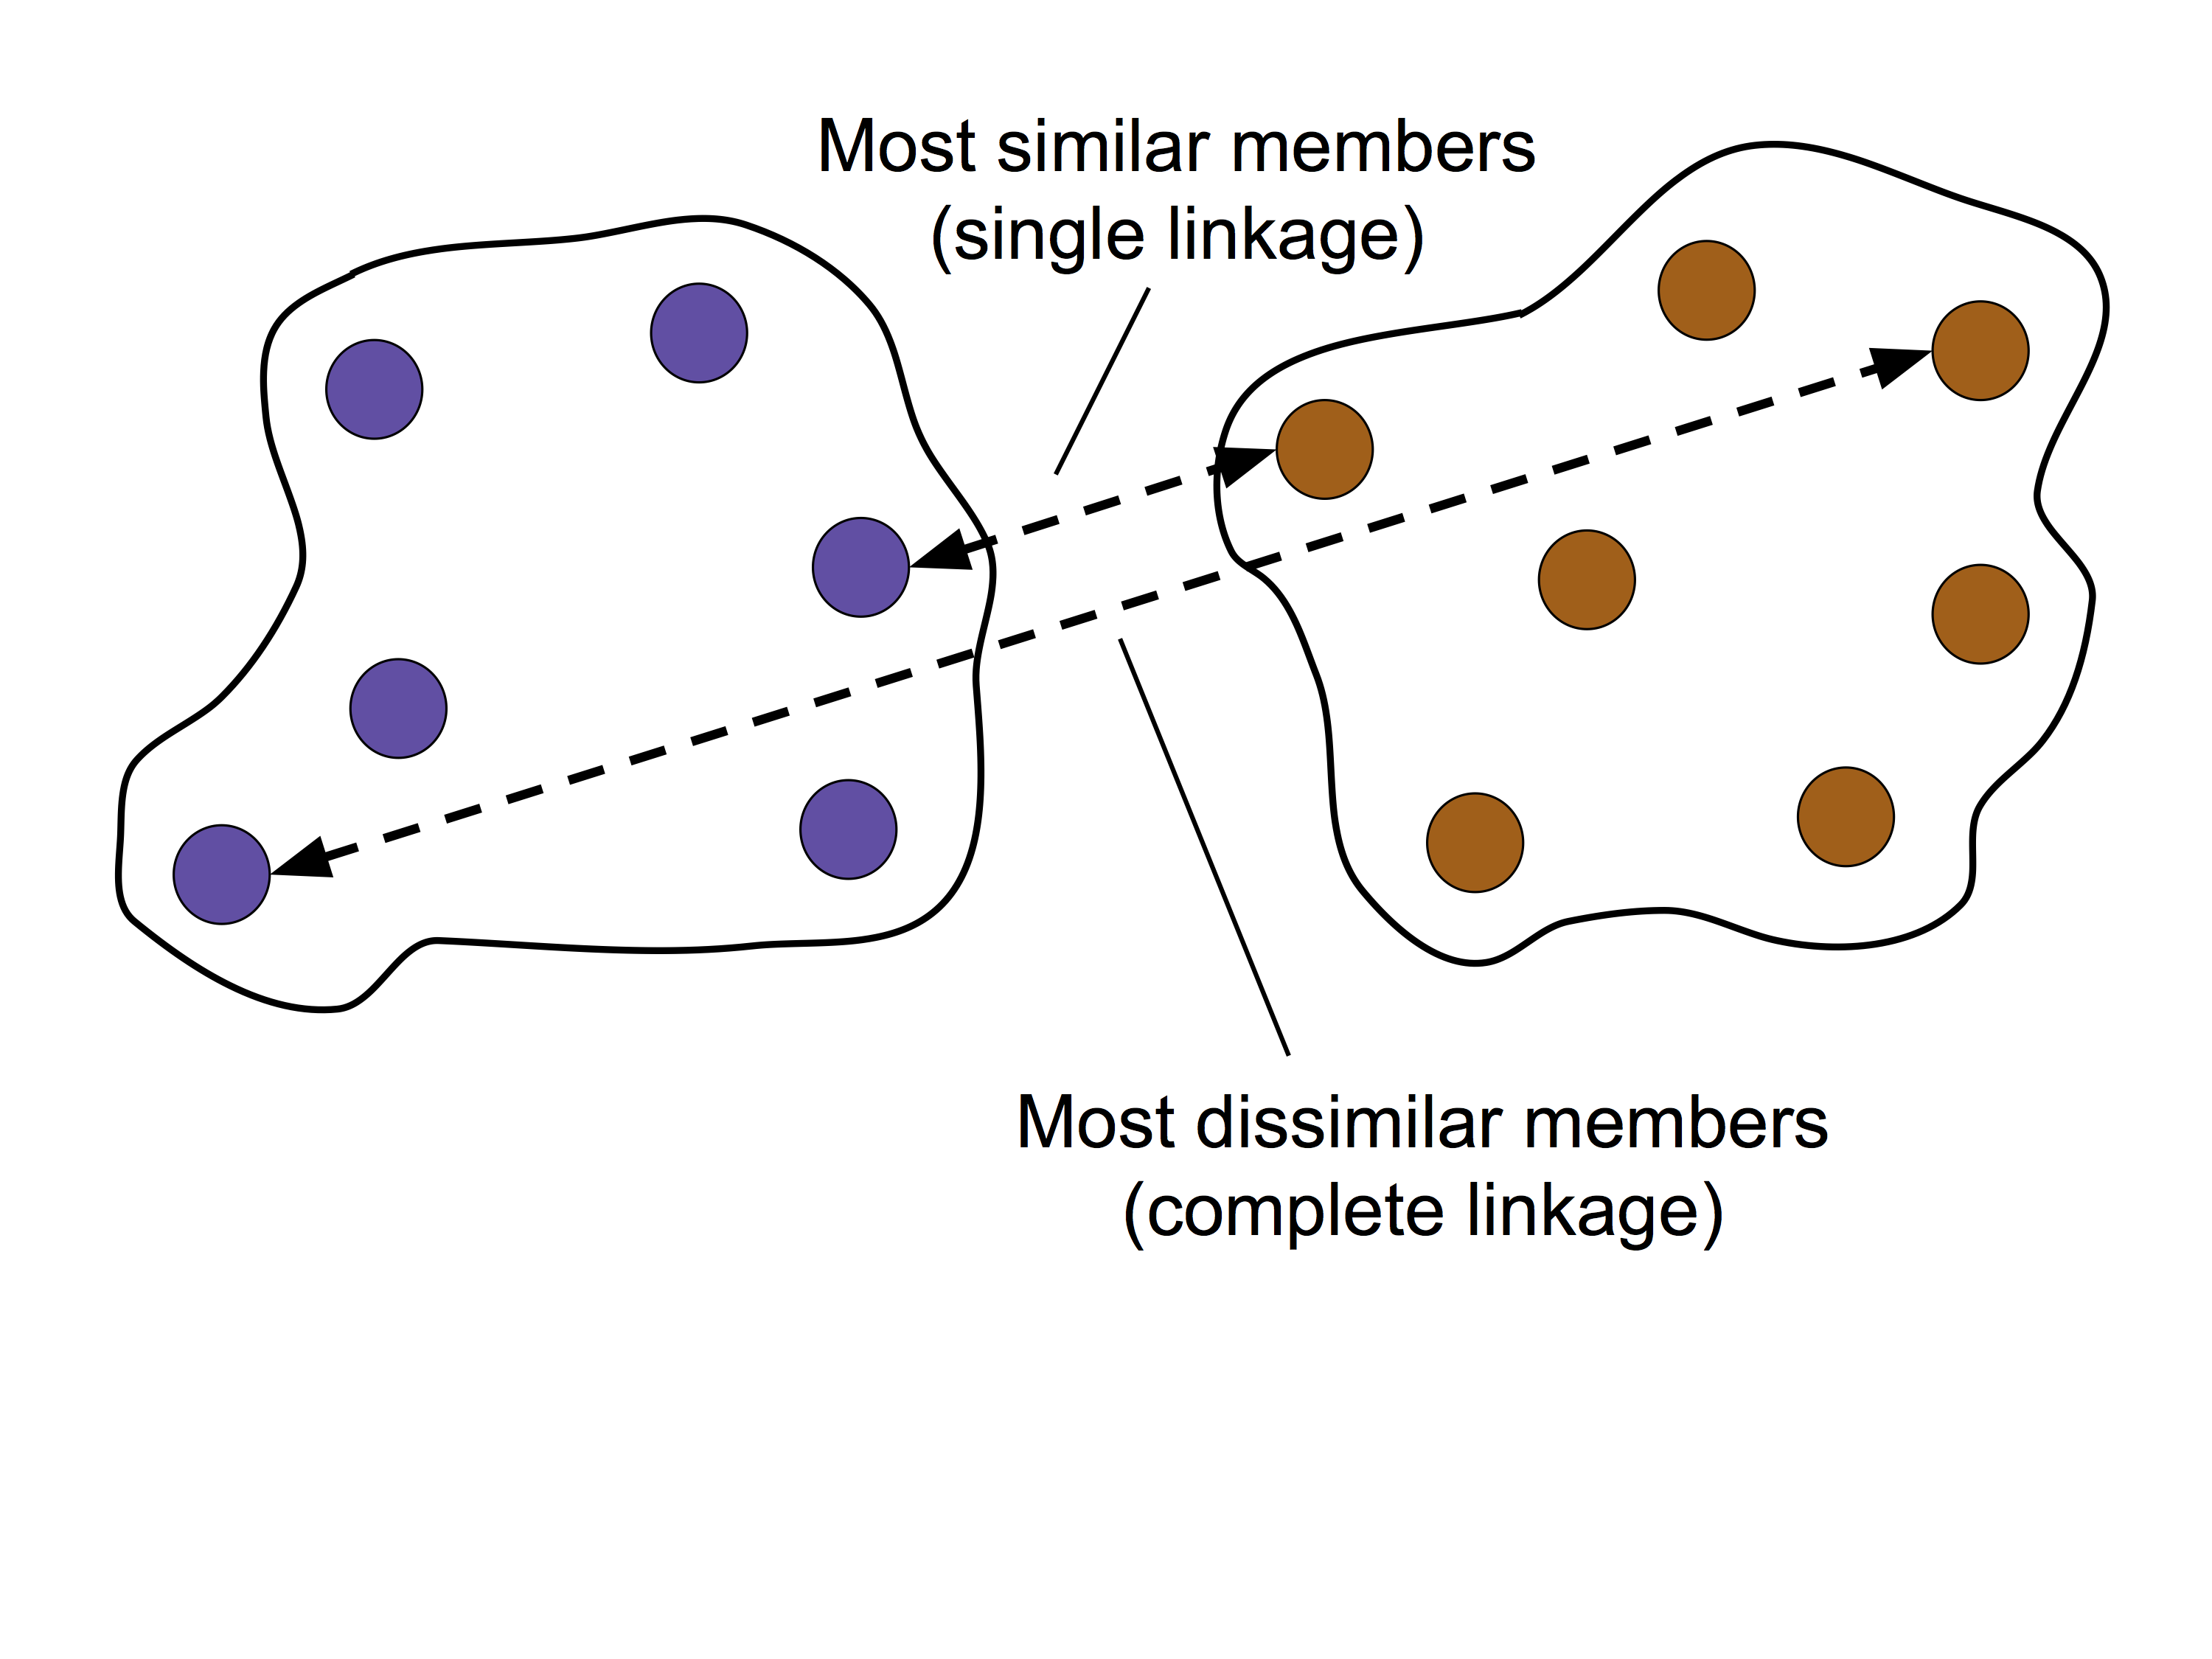

In [11]:
Image(filename='./images/11_07.png', width=400) 

In [12]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

## Performing hierarchical clustering on a distance matrix

Performing hierarchical clustering on a distance matrix is a common approach when you have pairwise distances between data points but not the original data points themselves. Hierarchical clustering builds a hierarchy of clusters by successively merging or splitting clusters based on the distances between data points.

Here's a step-by-step guide on how to perform hierarchical clustering on a distance matrix using Python and the `scipy` library:

1. **Compute Distance Matrix**: If you haven't already, compute the pairwise distance matrix between your data points. You can use methods like Euclidean distance, Manhattan distance, or any other distance metric suitable for your data.

2. **Perform Hierarchical Clustering**: Use the distance matrix to perform hierarchical clustering. You can choose between different linkage methods such as "single", "complete", "average", or "ward". Each linkage method determines how the distance between clusters is calculated.

3. **Visualize the Dendrogram**: Plot a dendrogram to visualize the hierarchical clustering structure. A dendrogram shows how clusters are merged or split at each step of the algorithm.


In [13]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.


A squareform distance matrix is a specific representation of pairwise distances between points in a dataset. It is called "squareform" because it's typically represented as a symmetric square matrix where each element represents the distance between two points.

When you compute pairwise distances between points using a function like `scipy.spatial.distance.pdist`, the output is a one-dimensional array containing the distances. However, in some contexts, such as when you're working with hierarchical clustering algorithms, it's more convenient to work with a square matrix where each element (i, j) represents the distance between points i and j.

The `scipy.spatial.distance.squareform` function is used to convert between the condensed distance matrix (output of `pdist`) and the squareform distance matrix. It can take a condensed distance matrix and return the corresponding squareform distance matrix, or vice versa.

When performing hierarchical clustering using the `scipy.cluster.hierarchy.linkage` function, there are two common ways to provide distance information:

1. **Condensed Distance Matrix**: This is a one-dimensional array that specifies the upper triangular part of the pairwise distance matrix. This format is commonly obtained from the `scipy.spatial.distance.pdist` function.

2. **Original Data Array with Metric**: You can directly pass the original data array to the `linkage` function along with the metric parameter specifying the distance metric to use. This is particularly useful when you have the original data points and want to compute pairwise distances using a specific metric like Euclidean distance.

It's important not to pass the squareform distance matrix directly to the `linkage` function because it can yield different distance values than expected. The reason is that the `linkage` function expects either a condensed distance matrix or the original data array with a specified metric. If you pass a squareform distance matrix directly, it may interpret the values as distances but not necessarily in the way you intend.

In [14]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/var/folders/xh/0ss0l2t96qg3sltsflt1205r0000gn/T/ipykernel_53573/2571863248.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [15]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [16]:
# 3. correct approach: Input matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


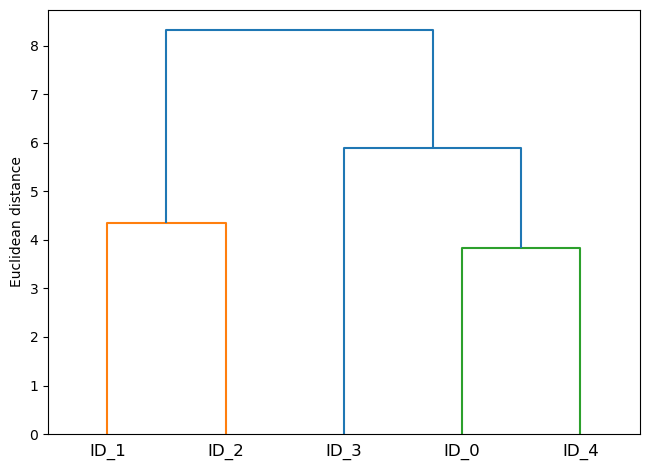

In [17]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

<br>

## Attaching dendrograms to a heat map

/var/folders/xh/0ss0l2t96qg3sltsflt1205r0000gn/T/ipykernel_53573/1264724331.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/xh/0ss0l2t96qg3sltsflt1205r0000gn/T/ipykernel_53573/1264724331.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


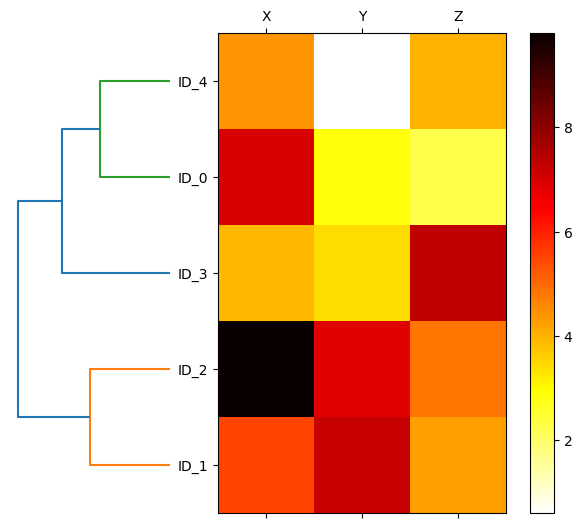

In [18]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()

<br>

## Applying agglomerative clustering via scikit-learn

In [19]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


/Users/ramyaakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [20]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


/Users/ramyaakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<br>
<br>

# Locating regions of high density via DBSCAN

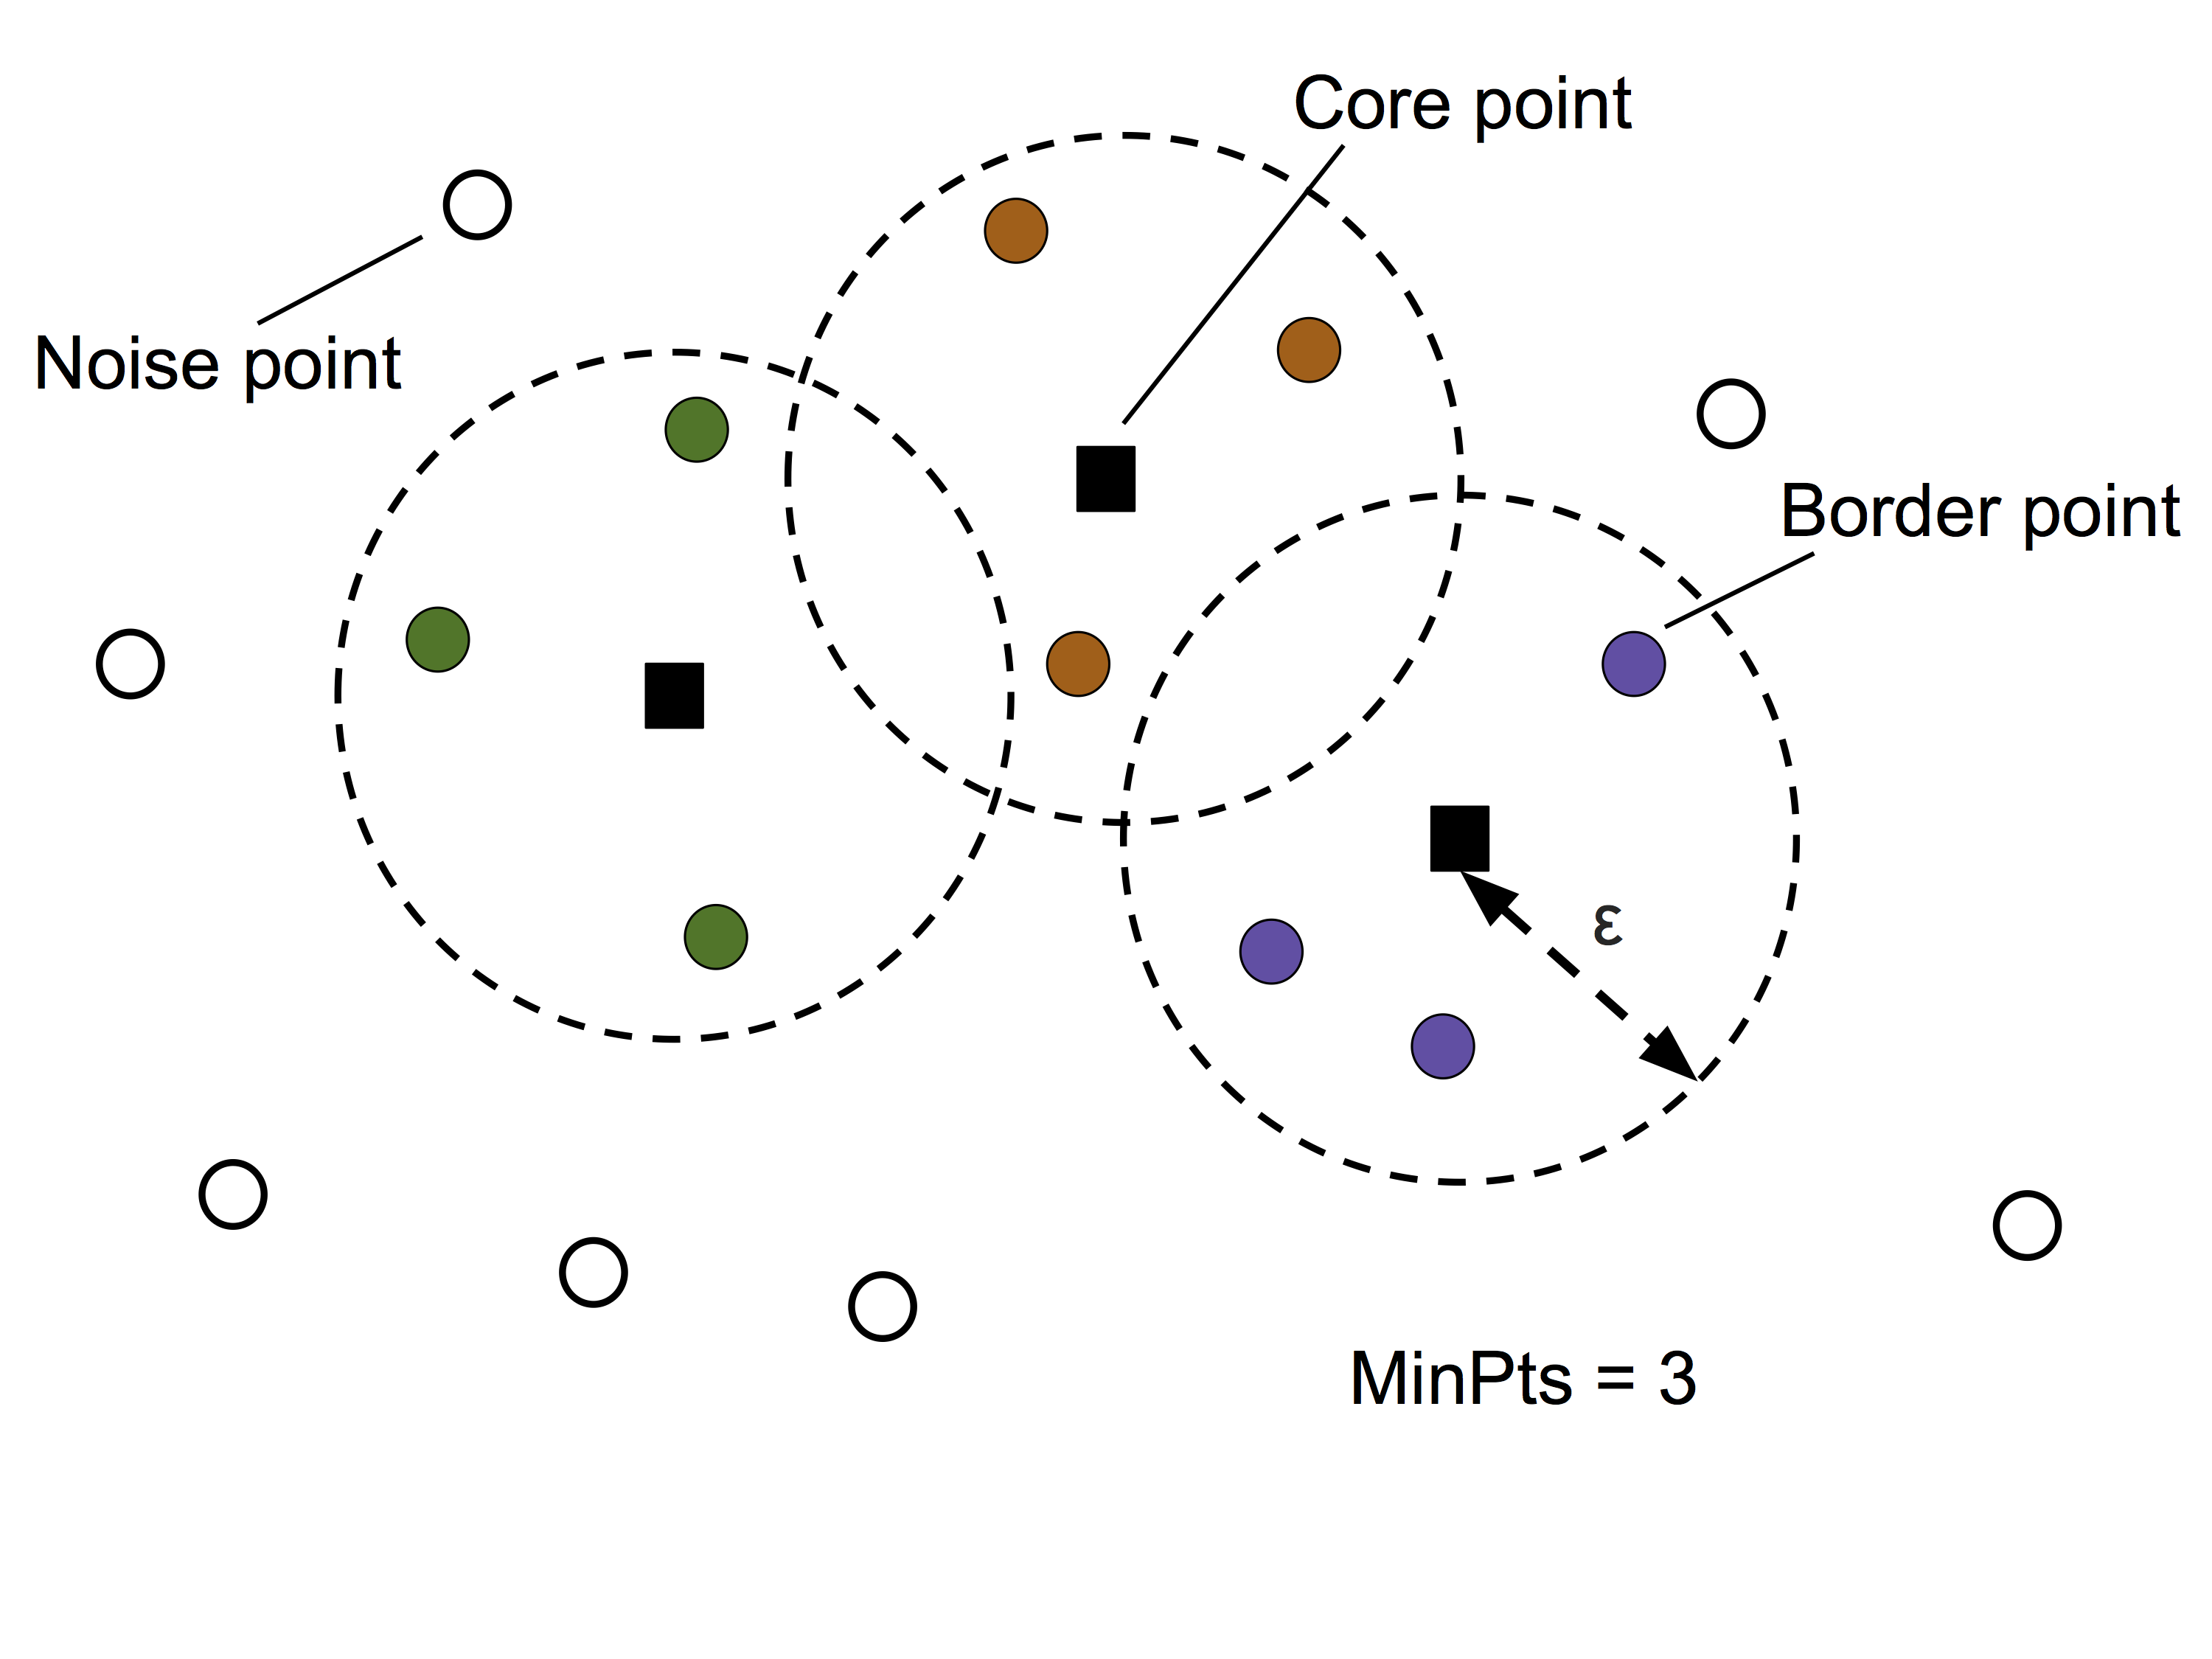

In [21]:
Image(filename='images/11_13.png', width=500) 

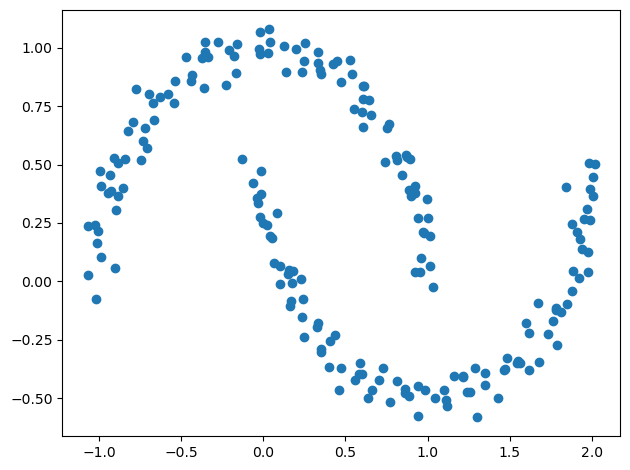

In [22]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

K-means and hierarchical clustering:

/Users/ramyaakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ramyaakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


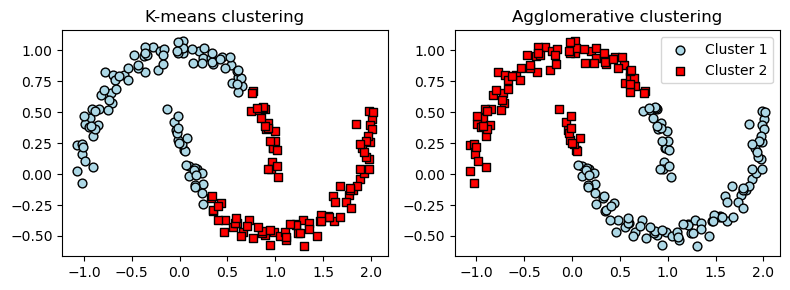

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('images/11_15.png', dpi=300)
plt.show()

Density-based clustering:

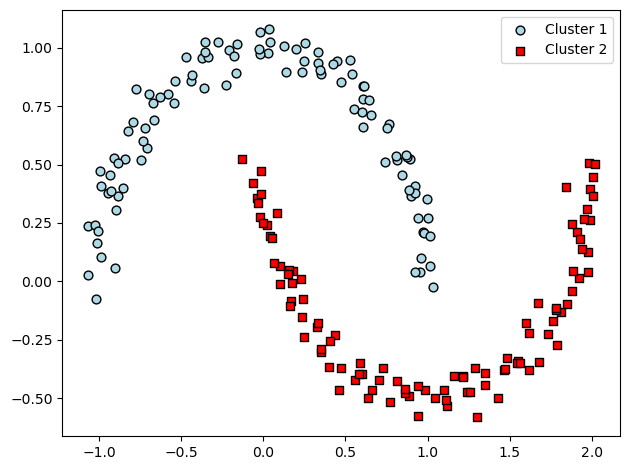

In [24]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()